In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

file_path = r"E:\Erfan\Fundamental intelligent systems\Project3\train.csv" 
df = pd.read_csv(file_path)

# 2. Data Preprocessing
# Dropping unnecessary columns
df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

# Handling missing values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 3. Features and target variable
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target variable

# 4. Encoding categorical features using One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), ['Age', 'Fare']),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), ['Sex', 'Embarked'])
    ])

# 5. Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Creating and training the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(max_depth=4, random_state=42))
])

# Fitting the model to the training data
model.fit(X_train, y_train)

# 7. Model evaluation
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Training Accuracy: {train_score}")
print(f"Test Accuracy: {test_score}")


Training Accuracy: 0.8216292134831461
Test Accuracy: 0.7821229050279329


Training Accuracy (Decision Tree): 0.8174157303370787
Test Accuracy (Decision Tree): 0.776536312849162
Number of nodes in the decision tree: 27
Depth of the decision tree: 4


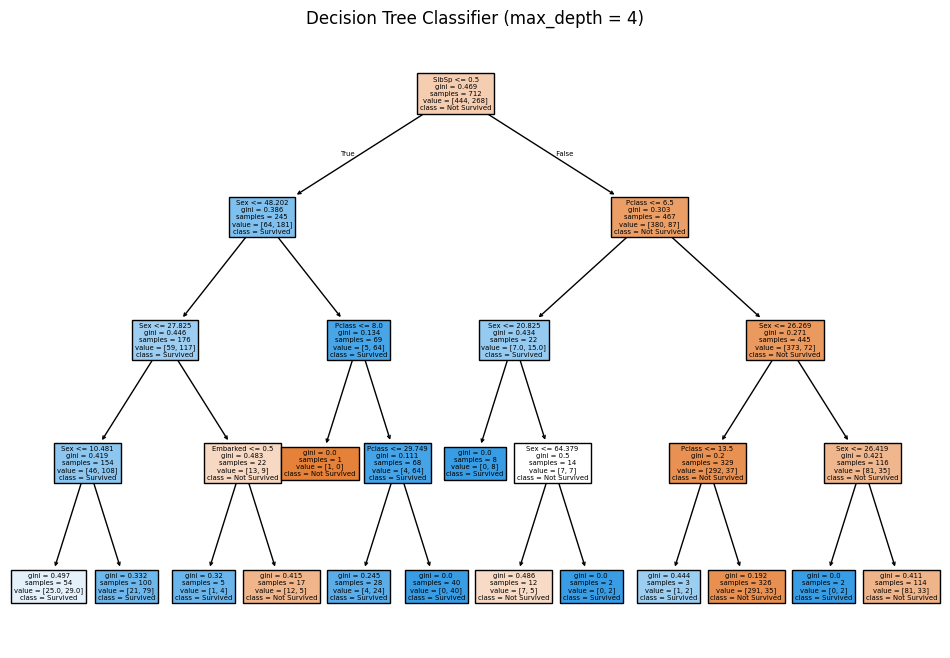

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# 1. Load the dataset
file_path = r"E:\Erfan\Fundamental intelligent systems\Project3\train.csv"  # Update with your file path
df = pd.read_csv(file_path)

# 2. Data Preprocessing
# Drop unnecessary columns
df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

# Handle missing values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 3. Features and target variable
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target variable

# 4. Encoding categorical features using One-Hot Encoding
# Handling categorical features separately and using OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), ['Age', 'Fare']),  # Impute missing numerical values
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Embarked'])  # One-Hot Encoding for categorical features
    ])

# 5. Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train the DecisionTree model with max_depth=4
model_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=4, random_state=42))
])

# Train the model
model_dt.fit(X_train, y_train)

# 7. Evaluate the model on training and test sets
train_score_dt = model_dt.score(X_train, y_train)
test_score_dt = model_dt.score(X_test, y_test)

# Print accuracy on training and test sets
print(f"Training Accuracy (Decision Tree): {train_score_dt}")
print(f"Test Accuracy (Decision Tree): {test_score_dt}")

# 8. Print the number of nodes and depth of the decision tree
print(f"Number of nodes in the decision tree: {model_dt.named_steps['classifier'].tree_.node_count}")
print(f"Depth of the decision tree: {model_dt.named_steps['classifier'].get_depth()}")

# 9. Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(model_dt.named_steps['classifier'], filled=True, feature_names=X.columns, class_names=["Not Survived", "Survived"])
plt.title("Decision Tree Classifier (max_depth = 4)")
plt.show()


6

Training Accuracy (Decision Tree without depth limit): 0.9789325842696629
Test Accuracy (Decision Tree without depth limit): 0.7262569832402235
Number of nodes in the decision tree: 367
Depth of the decision tree: 21


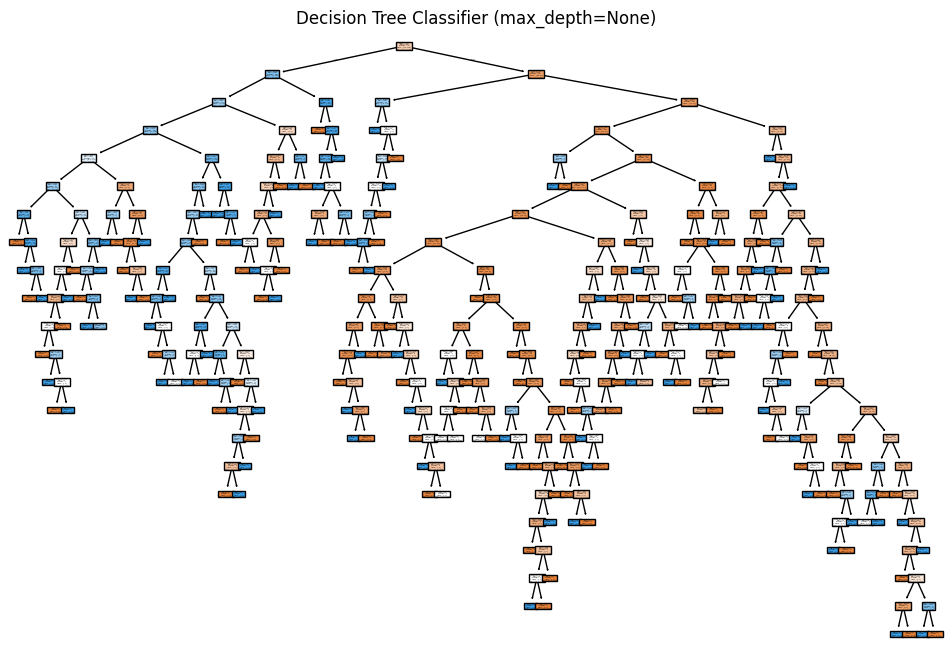

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# 1. Load the dataset
file_path = r"E:\Erfan\Fundamental intelligent systems\Project3\train.csv"  # Update with your file path
df = pd.read_csv(file_path)

# 2. Data Preprocessing
# Drop unnecessary columns
df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

# Handle missing values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 3. Features and target variable
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target variable

# 4. Encoding categorical features using One-Hot Encoding
# Handling categorical features separately and using OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), ['Age', 'Fare']),  # Impute missing numerical values
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Embarked'])  # One-Hot Encoding for categorical features
    ])

# 5. Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train the DecisionTree model without depth limit (max_depth=None)
model_dt_unlimited = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=None, random_state=42))
])

# Train the model
model_dt_unlimited.fit(X_train, y_train)

# 7. Evaluate the model on training and test sets
train_score_dt_unlimited = model_dt_unlimited.score(X_train, y_train)
test_score_dt_unlimited = model_dt_unlimited.score(X_test, y_test)

# Print accuracy on training and test sets
print(f"Training Accuracy (Decision Tree without depth limit): {train_score_dt_unlimited}")
print(f"Test Accuracy (Decision Tree without depth limit): {test_score_dt_unlimited}")

# 8. Print the number of nodes and depth of the decision tree
print(f"Number of nodes in the decision tree: {model_dt_unlimited.named_steps['classifier'].tree_.node_count}")
print(f"Depth of the decision tree: {model_dt_unlimited.named_steps['classifier'].get_depth()}")

# 9. Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(model_dt_unlimited.named_steps['classifier'], filled=True, feature_names=X.columns, class_names=["Not Survived", "Survived"])
plt.title("Decision Tree Classifier (max_depth=None)")
plt.show()


6(b)

Training Accuracy (max_depth=None): 0.9789325842696629
Test Accuracy (max_depth=None): 0.7262569832402235
Training Accuracy (max_depth=10): 0.9073033707865169
Test Accuracy (max_depth=10): 0.7430167597765364
Training Accuracy (max_depth=5): 0.8370786516853933
Test Accuracy (max_depth=5): 0.7318435754189944
Training Accuracy (max_depth=3): 0.8061797752808989
Test Accuracy (max_depth=3): 0.7597765363128491


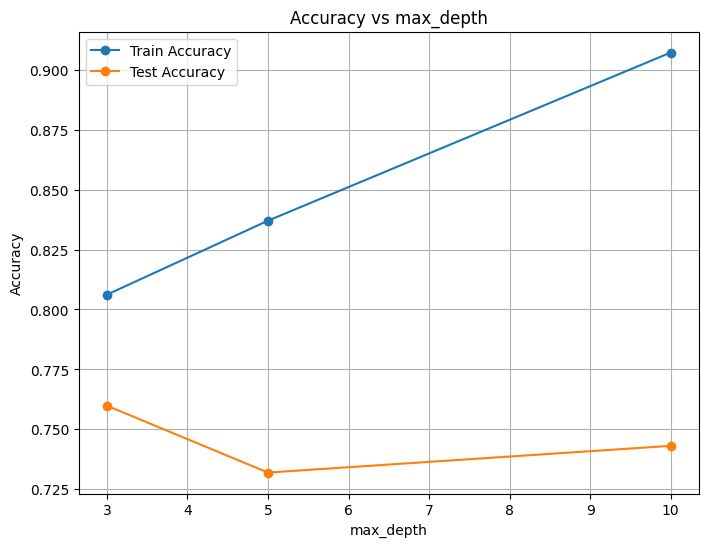

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# 1. Load the dataset
file_path = r"E:\Erfan\Fundamental intelligent systems\Project3\train.csv"  # Update with your file path
df = pd.read_csv(file_path)

# 2. Data Preprocessing
# Drop unnecessary columns
df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

# Handle missing values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 3. Features and target variable
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target variable

# 4. Encoding categorical features using One-Hot Encoding
# Handling categorical features separately and using OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), ['Age', 'Fare']),  # Impute missing numerical values
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Embarked'])  # One-Hot Encoding for categorical features
    ])

# 5. Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train the DecisionTree model with max_depth=None
model_dt_unlimited = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=None, random_state=42))
])

# Train the model
model_dt_unlimited.fit(X_train, y_train)

# 7. Evaluate the model on training and test sets
train_score_dt_unlimited = model_dt_unlimited.score(X_train, y_train)
test_score_dt_unlimited = model_dt_unlimited.score(X_test, y_test)

# Print accuracy on training and test sets for max_depth=None
print(f"Training Accuracy (max_depth=None): {train_score_dt_unlimited}")
print(f"Test Accuracy (max_depth=None): {test_score_dt_unlimited}")

# 8. Train the DecisionTree model with max_depth=10
model_dt_10 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=10, random_state=42))
])

# Train the model
model_dt_10.fit(X_train, y_train)

# 9. Evaluate the model on training and test sets for max_depth=10
train_score_dt_10 = model_dt_10.score(X_train, y_train)
test_score_dt_10 = model_dt_10.score(X_test, y_test)

# Print accuracy on training and test sets for max_depth=10
print(f"Training Accuracy (max_depth=10): {train_score_dt_10}")
print(f"Test Accuracy (max_depth=10): {test_score_dt_10}")

# 10. Train the DecisionTree model with max_depth=5
model_dt_5 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=5, random_state=42))
])

# Train the model
model_dt_5.fit(X_train, y_train)

# 11. Evaluate the model on training and test sets for max_depth=5
train_score_dt_5 = model_dt_5.score(X_train, y_train)
test_score_dt_5 = model_dt_5.score(X_test, y_test)

# Print accuracy on training and test sets for max_depth=5
print(f"Training Accuracy (max_depth=5): {train_score_dt_5}")
print(f"Test Accuracy (max_depth=5): {test_score_dt_5}")

# 12. Train the DecisionTree model with max_depth=3
model_dt_3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=3, random_state=42))
])

# Train the model
model_dt_3.fit(X_train, y_train)

# 13. Evaluate the model on training and test sets for max_depth=3
train_score_dt_3 = model_dt_3.score(X_train, y_train)
test_score_dt_3 = model_dt_3.score(X_test, y_test)

# Print accuracy on training and test sets for max_depth=3
print(f"Training Accuracy (max_depth=3): {train_score_dt_3}")
print(f"Test Accuracy (max_depth=3): {test_score_dt_3}")


# 1. Load the dataset
file_path = r"E:\Erfan\Fundamental intelligent systems\Project3\train.csv"  # Update with your file path
df = pd.read_csv(file_path)

# 2. Data Preprocessing
# Drop unnecessary columns
df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

# Handle missing values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Fill missing values in 'Embarked' column

# 3. Features and target variable
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target variable

# 4. Encoding categorical features using One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), ['Age', 'Fare']),  # Impute missing numerical values
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Embarked'])  # One-Hot Encoding for categorical features
    ])

# 5. Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Lists to store results for plotting
train_scores = []
test_scores = []
depth_values = [None, 3, 5, 10]

# Loop over different max_depth values
for depth in depth_values:
    # Train the DecisionTree model with current max_depth
    model_dt = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(max_depth=depth, random_state=42))
    ])

    # Fit the model
    model_dt.fit(X_train, y_train)

    # Evaluate the model on training and test sets
    train_scores.append(model_dt.score(X_train, y_train))
    test_scores.append(model_dt.score(X_test, y_test))

# 7. Plot training and testing accuracy vs. max_depth
plt.figure(figsize=(8, 6))
plt.plot(depth_values, train_scores, marker='o', label='Train Accuracy')
plt.plot(depth_values, test_scores, marker='o', label='Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs max_depth')
plt.legend()
plt.grid(True)
plt.show()


max_depth=3 => Train Accuracy: 0.8343, Test Accuracy: 0.7989
max_depth=5 => Train Accuracy: 0.8567, Test Accuracy: 0.7933
max_depth=10 => Train Accuracy: 0.9565, Test Accuracy: 0.7709
max_depth=None => Train Accuracy: 1.0000, Test Accuracy: 0.7542


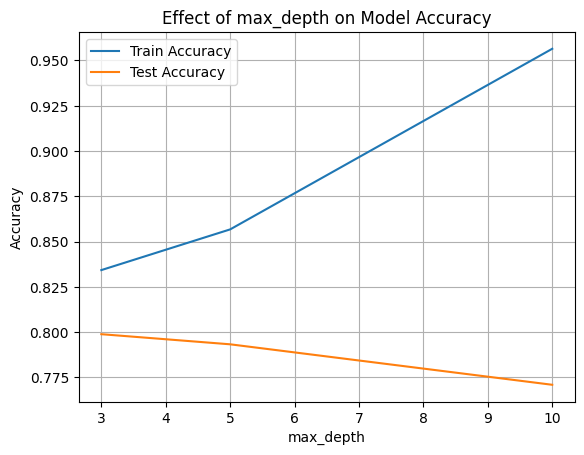

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# بارگذاری داده‌ها (داده‌های Titanic در اینجا فرض شده)
file_path = r"E:\Erfan\Fundamental intelligent systems\Project3\train.csv"  # مسیر فایل داده‌ها
df = pd.read_csv(file_path)

# پیش پردازش داده‌ها
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)  # حذف ستون‌های غیر ضروری
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # پر کردن مقادیر گمشده

# تبدیل ویژگی‌های دسته‌ای به عددی با استفاده از One Hot Encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# تقسیم داده‌ها به ویژگی‌ها و هدف
X = df.drop('Survived', axis=1)  # ویژگی‌ها
y = df['Survived']  # هدف

# تقسیم داده‌ها به دو بخش آموزش و آزمون (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# لیست عمق‌های مختلف درخت
depths = [3, 5, 10, None]
train_accuracies = []
test_accuracies = []

# آموزش و ارزیابی مدل برای هر عمق
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # پیش‌بینی و محاسبه دقت
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    # چاپ عمق و دقت مدل
    print(f"max_depth={depth} => Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    
# رسم نمودار دقت
plt.plot(depths, train_accuracies, label='Train Accuracy')
plt.plot(depths, test_accuracies, label='Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Effect of max_depth on Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()


=== درخت کامل (بدون هرس) ===
Train Accuracy: 0.9831
Test  Accuracy: 0.8268
n_nodes: 303, depth: 23

=== چند نمونه از نتایج هرس ===
ccp_alpha=5.01605e-05 | Train=0.9831 | Test=0.8268 | nodes=301 | depth=23
ccp_alpha=0.000628326 | Train=0.9817 | Test=0.8268 | nodes=261 | depth=20
ccp_alpha=0.00093633 | Train=0.9705 | Test=0.8101 | nodes=213 | depth=20
ccp_alpha=0.00122893 | Train=0.9565 | Test=0.8101 | nodes=179 | depth=18
ccp_alpha=0.00175562 | Train=0.9185 | Test=0.7989 | nodes=89 | depth=11
ccp_alpha=0.00243202 | Train=0.8961 | Test=0.7877 | nodes=55 | depth=10
ccp_alpha=0.00385962 | Train=0.8567 | Test=0.7542 | nodes=27 | depth=6
ccp_alpha=0.142598 | Train=0.6166 | Test=0.6145 | nodes=1 | depth=0



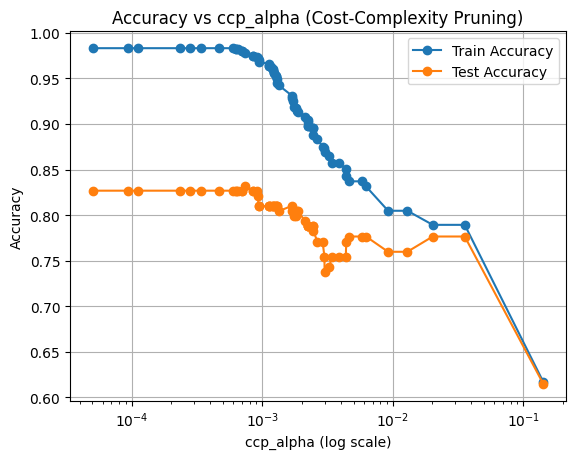

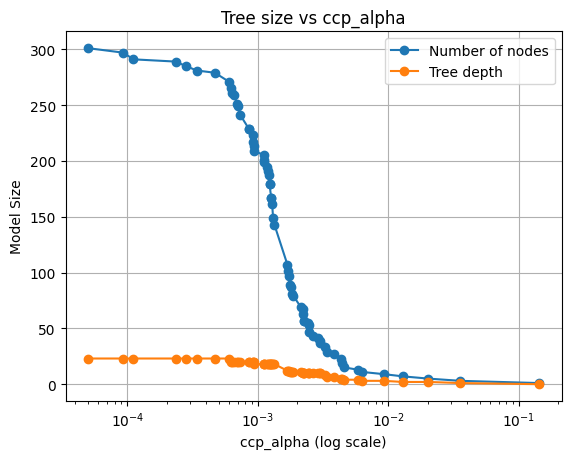

=== بهترین alpha (بر اساس بیشترین دقت تست) ===
best_alpha: 0.000734168
Train Accuracy: 0.9775
Test  Accuracy: 0.8324
n_nodes: 241, depth: 20


In [ ]:
# =========================
# (ج) Cost-Complexity Pruning برای درخت تصمیم
# =========================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# -------------------------
# 0) تنظیمات
# -------------------------
RANDOM_STATE = 42  
DATA_PATH = r"E:\Erfan\Fundamental intelligent systems\Project3\train.csv"   

# -------------------------
# 1) خواندن داده
# -------------------------
df = pd.read_csv(DATA_PATH)

if "Survived" not in df.columns:
    raise ValueError("ستون هدف (Survived) داخل داده پیدا نشد. لطفاً فایل train.csv تایتانیک را بده.")


y = df["Survived"].astype(int)

drop_cols = [c for c in ["Cabin", "Ticket", "Name", "PassengerId"] if c in df.columns]
X = df.drop(columns=["Survived"] + drop_cols)

# تشخیص ستون‌های عددی / دسته‌ای
cat_cols = [c for c in X.columns if X[c].dtype == "object"]
num_cols = [c for c in X.columns if c not in cat_cols]

# -------------------------
# 3) تقسیم Train/Test (80/20)
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y  # بهتره برای تایتانیک
)

# -------------------------
# 4) پیش‌پردازش (Impute + OneHot) به صورت Pipeline (بدون لیک شدن اطلاعات تست)
# -------------------------
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)

# -------------------------
# 5) یک درخت کامل (بدون محدودیت عمق) برای گرفتن مسیر pruning
#    نکته: pruning_path باید روی داده‌های عددی‌شده اجرا شود، پس اول transform می‌کنیم
# -------------------------
preprocess.fit(X_train)

X_train_tr = preprocess.transform(X_train)
X_test_tr  = preprocess.transform(X_test)

full_tree = DecisionTreeClassifier(
    random_state=RANDOM_STATE,
    max_depth=None
)
full_tree.fit(X_train_tr, y_train)

ytr_pred = full_tree.predict(X_train_tr)
yte_pred = full_tree.predict(X_test_tr)

print("=== درخت کامل (بدون هرس) ===")
print(f"Train Accuracy: {accuracy_score(y_train, ytr_pred):.4f}")
print(f"Test  Accuracy: {accuracy_score(y_test,  yte_pred):.4f}")
print(f"n_nodes: {full_tree.tree_.node_count}, depth: {full_tree.get_depth()}")
print()

# -------------------------
# 6) گرفتن مجموعه ccp_alpha ها از cost_complexity_pruning_path
# -------------------------
path = full_tree.cost_complexity_pruning_path(X_train_tr, y_train)
ccp_alphas = path.ccp_alphas

# فقط alpha های مثبت (حذف 0)
ccp_alphas_pos = ccp_alphas[ccp_alphas > 0]

# اگر هیچ آلفای مثبتی نبود (نادر)، حداقل چند مقدار خیلی کوچک بساز
if len(ccp_alphas_pos) == 0:
    ccp_alphas_pos = np.array([1e-6, 1e-5, 1e-4, 1e-3])

# -------------------------
# 7) آموزش یک درخت برای هر ccp_alpha و محاسبه دقت‌ها
# -------------------------
train_accs = []
test_accs = []
nodes_list = []
depth_list = []

for a in ccp_alphas_pos:
    model = DecisionTreeClassifier(
        random_state=RANDOM_STATE,
        ccp_alpha=a
    )
    model.fit(X_train_tr, y_train)

    ytr = model.predict(X_train_tr)
    yte = model.predict(X_test_tr)

    train_accs.append(accuracy_score(y_train, ytr))
    test_accs.append(accuracy_score(y_test, yte))
    nodes_list.append(model.tree_.node_count)
    depth_list.append(model.get_depth())

# چاپ چند نتیجه‌ی نمونه (اختیاری)
print("=== چند نمونه از نتایج هرس ===")
for i in np.linspace(0, len(ccp_alphas_pos)-1, num=min(8, len(ccp_alphas_pos)), dtype=int):
    print(f"ccp_alpha={ccp_alphas_pos[i]:.6g} | "
          f"Train={train_accs[i]:.4f} | Test={test_accs[i]:.4f} | "
          f"nodes={nodes_list[i]} | depth={depth_list[i]}")
print()

# -------------------------
# 8) رسم دقت‌ها بر حسب ccp_alpha (مقیاس لگاریتمی)
# -------------------------
plt.figure()
plt.plot(ccp_alphas_pos, train_accs, marker="o", label="Train Accuracy")
plt.plot(ccp_alphas_pos, test_accs, marker="o", label="Test Accuracy")
plt.xscale("log")
plt.xlabel("ccp_alpha (log scale)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs ccp_alpha (Cost-Complexity Pruning)")
plt.grid(True)
plt.legend()
plt.show()

# (اختیاری ولی خیلی کمک‌کننده) رسم اندازه درخت نسبت به alpha
plt.figure()
plt.plot(ccp_alphas_pos, nodes_list, marker="o", label="Number of nodes")
plt.plot(ccp_alphas_pos, depth_list, marker="o", label="Tree depth")
plt.xscale("log")
plt.xlabel("ccp_alpha (log scale)")
plt.ylabel("Model Size")
plt.title("Tree size vs ccp_alpha")
plt.grid(True)
plt.legend()
plt.show()

# -------------------------
# 9) انتخاب بهترین alpha (اختیاری)
#    معیار ساده: بیشترین Test Accuracy
# -------------------------
best_idx = int(np.argmax(test_accs))
best_alpha = float(ccp_alphas_pos[best_idx])

print("=== بهترین alpha (بر اساس بیشترین دقت تست) ===")
print(f"best_alpha: {best_alpha:.6g}")
print(f"Train Accuracy: {train_accs[best_idx]:.4f}")
print(f"Test  Accuracy: {test_accs[best_idx]:.4f}")
print(f"n_nodes: {nodes_list[best_idx]}, depth: {depth_list[best_idx]}")
